# CS5016 Computational Methods & Applications

**Lec 6, 13/Feb/2025, Random Graphs**

## Agenda

1. A quick introduction to $G(n,p)$ model
   - Graph Generation
   - Phase Transitions (number of components, size of largest component, diameter)
   - Degree Histograms
   - Distribution of centrality measures
2. $G(n,m)$ model
   - Comparison with $G(n,p)$ model
3. Barabasi-Albert model
   - Phase Transitions (number of components, size of largest component, diameter)
   - Degree Histograms
   - Distribution of centrality measures
4. Rumour, Disease spreading in networks

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

## Erdos-Renyi Distribution of Graphs $G(n,p)$

Consider the following random experiment.
- Start with an empty graph on $n$ nodes
- For each pair of nodes, add an edge between the pair with probability $p$ independent of other pairs

$G(n,p)$ is a distribution over $n$-vertex random graphs generated by the above process.

If $p = 0.5$, then it generates a uniform distribution over $n$-vertex graphs.

### Introduction

In [4]:
## Generate Erdos-Renyi Random Graph by Hand (n = 20, p = 0.1, 0.5, 0.9)

random.seed()

n = 20
p = 0.1

G = nx.Graph()
nodes = range(n)
G.add_nodes_from(nodes)

## Addding the edges using our random experiment
for i in range(n):
    for j in range(i+1, n):
        if random.random() < p:
            G.add_edge(i,j)

In [5]:
# Check some common parameters and properties of the graph
# Wrap it up as a function so that we can reuse it for other graphs

def graph_stats(G):
    print("Number of nodes \t=", G.number_of_nodes())
    print("Number of edges \t=", G.number_of_edges())
    print("Average Degree \t\t=", 2.0* G.number_of_edges()/G.number_of_nodes() )
    print("Number of components \t=", nx.number_connected_components(G))
    print("Largest component \t=", max([len(Gc) for Gc in nx.connected_components(G)]))
    if nx.is_connected(G):
        print("Diameter \t\t=", nx.diameter(G))
    print("Is planar \t\t=", nx.is_planar(G))
    print("Is bipartite \t\t=", nx.is_bipartite(G))

Number of nodes 	= 20
Number of edges 	= 24
Average Degree 		= 2.4
Number of components 	= 2
Largest component 	= 19
Is planar 		= True
Is bipartite 		= False


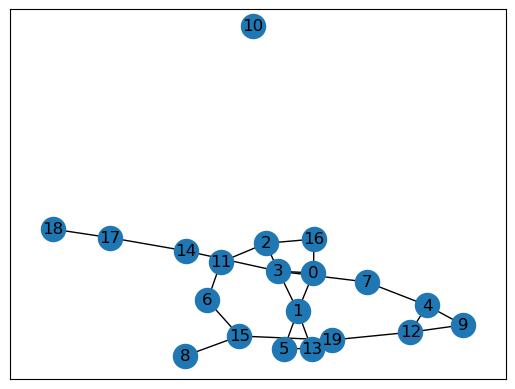

In [5]:
# Check the parameters of the generated graph and draw it
graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G)

In [6]:
## Generate the same Erdos-Renyi Random Graphs using the built-in function

n = 20
p = 0.1
G = nx.gnp_random_graph(n, p)

Number of nodes 	= 20
Number of edges 	= 22
Average Degree 		= 2.2
Number of components 	= 3
Largest component 	= 17
Is planar 		= True
Is bipartite 		= False


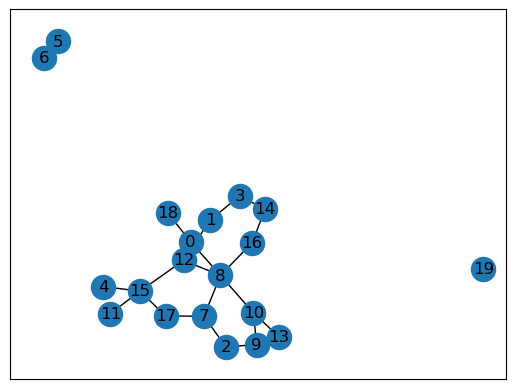

In [7]:
# Check the parameters of the generated graph and draw it
graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G)

### Phase Transitions

- How do the graph parameters change as we increase $p$ from $0$ to $1$.
- If the change is abrupt, we call it a phase transition

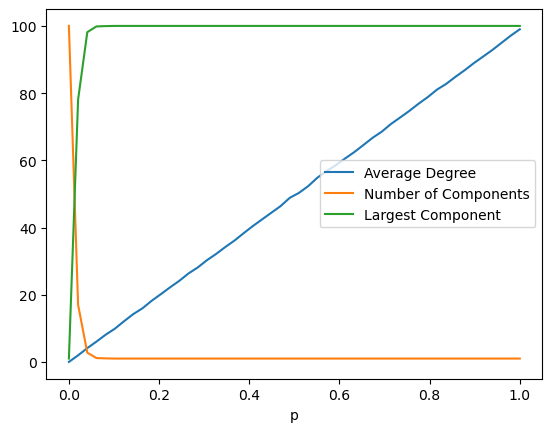

In [7]:
# Phase Transitions of G(100, p) for p varying from 0 to 0.1
# (Average Degree, Number of Components, Size of largest component, Diameter when Connected)
# Estimate each parameter averaged over 10 repetitions

n = 100
steps = 50
p_vals = np.linspace(0, 1, steps) 

repeats = 20
avg_deg = []
num_comps = []
max_comp = []
dia = []

for p in p_vals:
    total_adeg = 0
    total_comp = 0
    total_size = 0
    total_dia = 0
    for i in range(repeats):
        G = nx.gnp_random_graph(n, p)
        adeg = 2.0 * G.number_of_edges() / G.number_of_nodes()
        total_adeg += adeg
        total_comp += nx.number_connected_components(G)
        total_size += max([len(Gc) for Gc in nx.connected_components(G)])
        if nx.is_connected(G):
            total_dia += nx.diameter(G)
        else:
            total_dia = float('inf')
    avg_deg.append(total_adeg/repeats)
    num_comps.append(total_comp/repeats)
    max_comp.append(total_size/repeats)
    dia.append(total_dia/repeats)

plt.plot(p_vals, avg_deg, label='Average Degree')
plt.plot(p_vals, num_comps, label='Number of Components')
plt.plot(p_vals, max_comp, label='Largest Component')
plt.xlabel('p')
plt.legend()

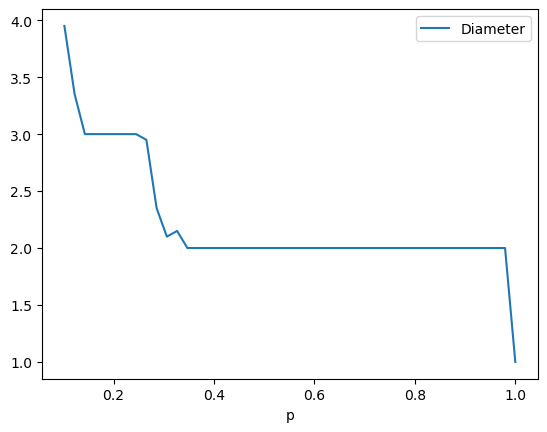

In [8]:
## A closer look at the diameter transition

plt.plot(p_vals, dia, label='Diameter')
plt.xlabel('p')
plt.legend()


### Degree Analysis

Text(0, 0.5, 'Number of nodes')

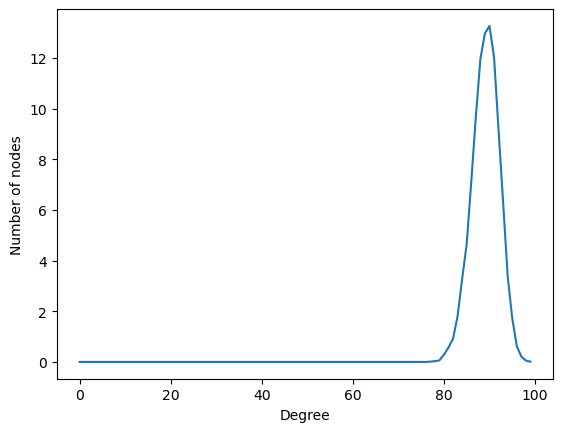

In [9]:
# Plot the degree histogram of G(n,p) averaged over 100 trials each for p = 0.1, 0.5

n = 100
p = 0.9

repeats = 100
deg_hist_table = np.zeros((repeats, n))

random.seed()
for i in range(repeats):
    G = nx.erdos_renyi_graph(n, p)
    dh = nx.degree_histogram(G)
    deg_hist_table[i,0:len(dh)] = dh 

deg_hist = sum(deg_hist_table)/repeats
plt.plot(deg_hist)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

### Centrality Analysis

In [10]:
## Exercise 1a. Analyse the centrality measures of G(1000, 0.1)


# Generate the Erdős-Rényi graph
n = 1000
p = 0.1
G = nx.gnp_random_graph(n, p, seed=42)

# Check if the graph is connected; if not, use the largest connected component
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(
        f"Using largest connected component with {G.number_of_nodes()} nodes.")

# Compute centrality measures
print("Computing degree centrality...")
degree_cent = list(nx.degree_centrality(G).values())

print("Computing betweenness centrality... (This may take some time)")
betweenness_cent = list(nx.betweenness_centrality(G).values())

print("Computing closeness centrality...")
closeness_cent = list(nx.closeness_centrality(G).values())

print("Computing eigenvector centrality...")
eigenvector_cent = list(nx.eigenvector_centrality(
    G, max_iter=1000, tol=1e-6).values())



Computing degree centrality...
Computing betweenness centrality... (This may take some time)
Computing closeness centrality...
Computing eigenvector centrality...


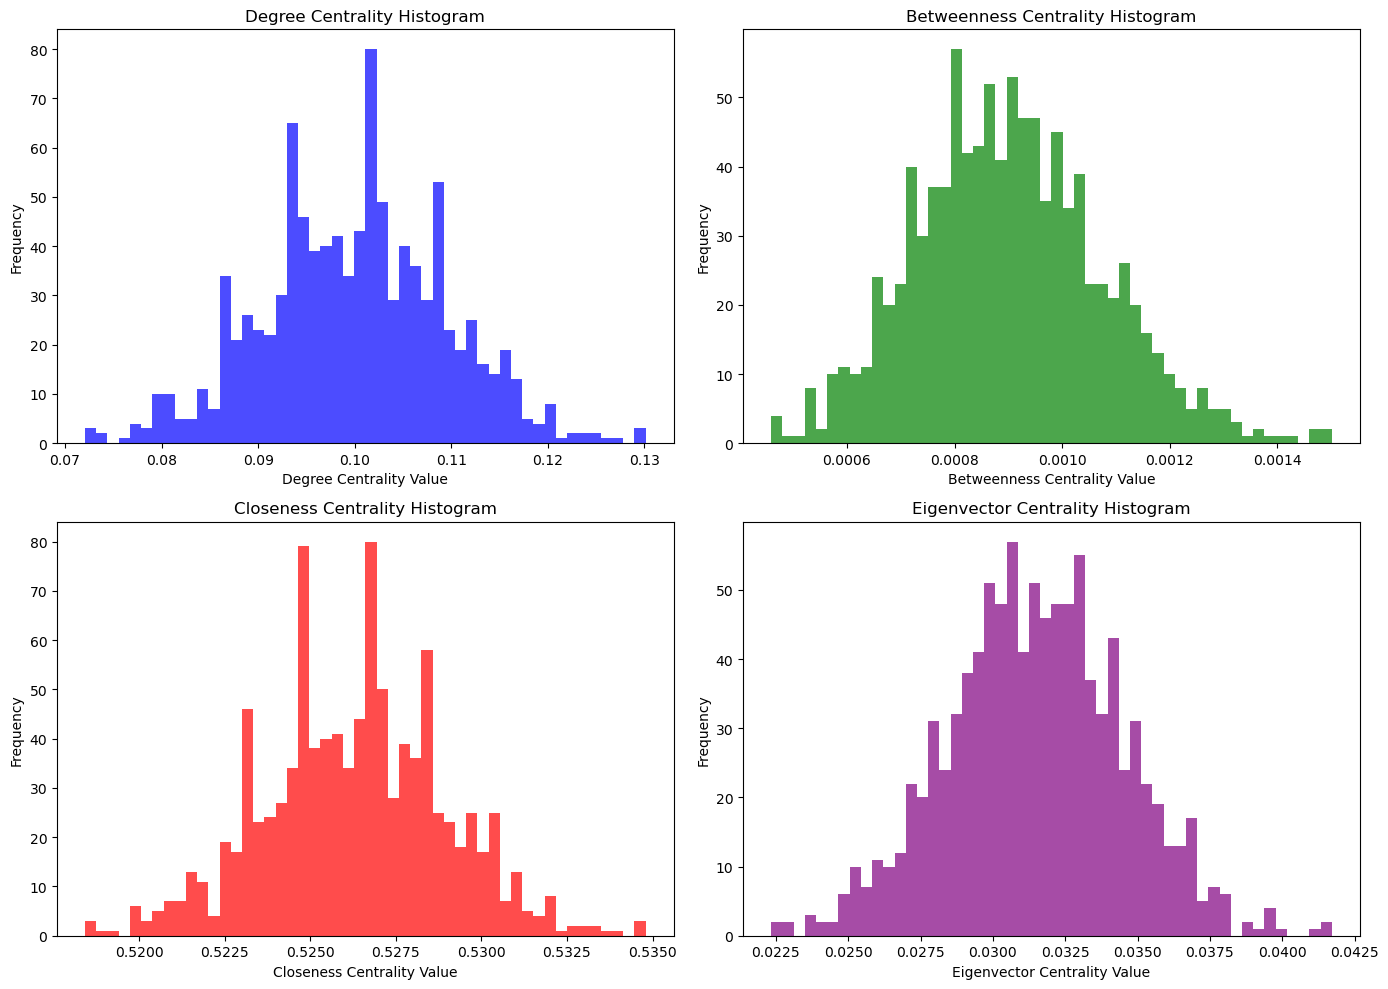

In [11]:
# Exercise 1b: Histogram of Centrality Measures of G(1000, 0.1)

# Plot histograms of centrality measures
plt.figure(figsize=(14, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.hist(degree_cent, bins=50, color='blue', alpha=0.7)
plt.title('Degree Centrality Histogram')
plt.xlabel('Degree Centrality Value')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(2, 2, 2)
plt.hist(betweenness_cent, bins=50, color='green', alpha=0.7)
plt.title('Betweenness Centrality Histogram')
plt.xlabel('Betweenness Centrality Value')
plt.ylabel('Frequency')

# Closeness Centrality
plt.subplot(2, 2, 3)
plt.hist(closeness_cent, bins=50, color='red', alpha=0.7)
plt.title('Closeness Centrality Histogram')
plt.xlabel('Closeness Centrality Value')
plt.ylabel('Frequency')

# Eigenvector Centrality
plt.subplot(2, 2, 4)
plt.hist(eigenvector_cent, bins=50, color='purple', alpha=0.7)
plt.title('Eigenvector Centrality Histogram')
plt.xlabel('Eigenvector Centrality Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## $G(n,m)$ Model

This random experiment consists of picking a set $m$ edges uniformly at random without repetition from the $\binom{n}{2}$ edges.

### Introduction

Number of nodes 	= 20
Number of edges 	= 30
Average Degree 		= 3.0
Number of components 	= 1
Largest component 	= 20
Diameter 		= 6
Is planar 		= False
Is bipartite 		= False


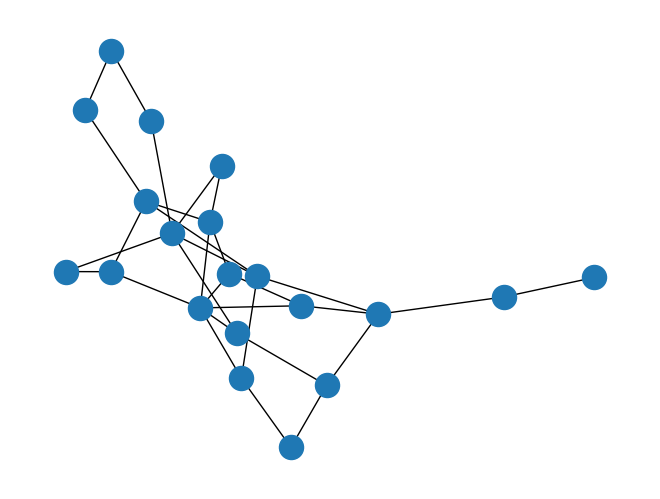

In [12]:
# Generate sample G(n, m) Graph using built-in function and display it

n = 20
m = 30

random.seed()
G = nx.gnm_random_graph(n,m)

graph_stats(G)
nx.draw(G)

### Degree Analysis

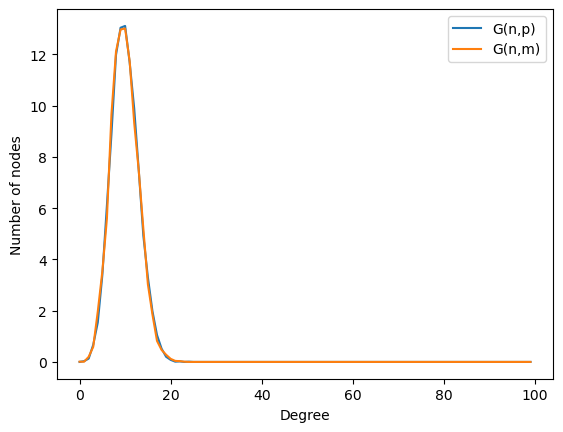

In [13]:
# Plot the degree histogram of G(n,m) averaged over 100 trials
# and compare it with the histogram of G(n,p) where m = p*nC2

n = 100
p = 0.1
m = int(0.1 * n * (n-1)/2)

repeats = 100
deg_hist_table_gnp = np.zeros((repeats, n))
deg_hist_table_gnm = np.zeros((repeats, n))

random.seed()
for i in range(repeats):
    G = nx.gnp_random_graph(n, p)
    dh = nx.degree_histogram(G)
    deg_hist_table_gnp[i,0:len(dh)] = dh 
    G = nx.gnm_random_graph(n, m)
    dh = nx.degree_histogram(G)
    deg_hist_table_gnm[i,0:len(dh)] = dh 


deg_hist_gnp = sum(deg_hist_table_gnp)/repeats
deg_hist_gnm = sum(deg_hist_table_gnm)/repeats

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.plot(deg_hist_gnp, label="G(n,p)")
plt.plot(deg_hist_gnm, label="G(n,m)")
plt.legend()

### Phase Transitions

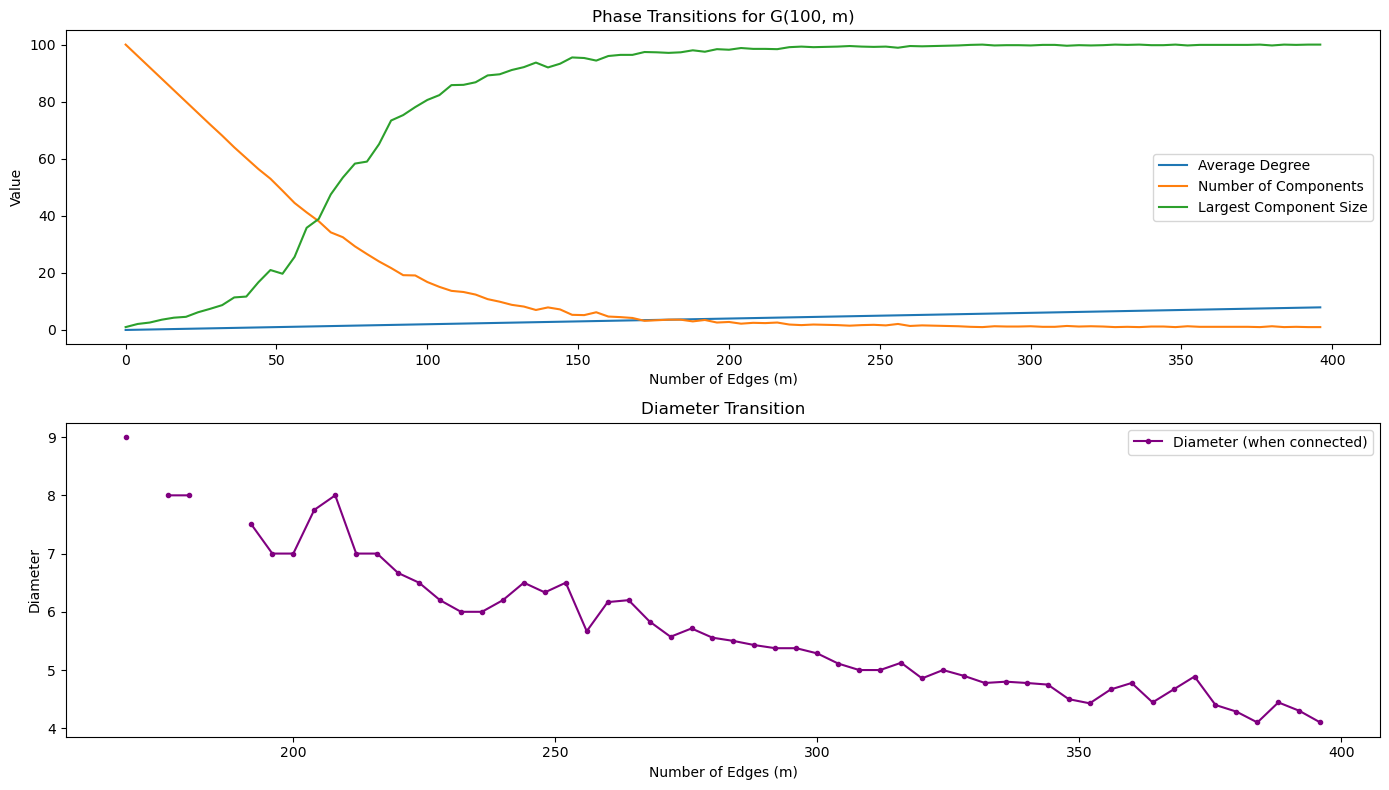

In [14]:
# Exercise 2: Phase Transitions of G(100, m) for 100 different values of m from 0 to 396
# (Average Degree, Number of Components, Size of largest component, Diameter when Connected)

# Parameters
n = 100
repeats = 10  # Number of trials per m
steps = 100    # Number of m values to sample
max_m = 396    # Maximum number of edges

# Generate m values as integers from 0 to max_m
m_vals = np.linspace(0, max_m, steps, dtype=int)

# Precompute average degree (deterministic for G(n, m))
avg_deg = [2 * m / n for m in m_vals]

# Initialize lists for metrics
num_comps = []
max_comp = []
dia = []

for m in m_vals:
    total_comp = 0.0
    total_size = 0.0
    total_dia = 0.0
    count_connected = 0

    for _ in range(repeats):
        G = nx.gnm_random_graph(n, m)
        # Number of components
        comp = nx.number_connected_components(G)
        total_comp += comp
        # Largest component size
        largest = max(len(c) for c in nx.connected_components(G))
        total_size += largest
        # Diameter if connected
        if nx.is_connected(G):
            current_dia = nx.diameter(G)
            total_dia += current_dia
            count_connected += 1

    # Average metrics
    num_comps.append(total_comp / repeats)
    max_comp.append(total_size / repeats)
    dia.append(total_dia / count_connected if count_connected > 0 else np.nan)

# Plotting
plt.figure(figsize=(14, 8))

# Plot 1: Average Degree, Components, Largest Component
plt.subplot(2, 1, 1)
plt.plot(m_vals, avg_deg, label='Average Degree')
plt.plot(m_vals, num_comps, label='Number of Components')
plt.plot(m_vals, max_comp, label='Largest Component Size')
plt.xlabel('Number of Edges (m)')
plt.ylabel('Value')
plt.title('Phase Transitions for G(100, m)')
plt.legend()

# Plot 2: Diameter
plt.subplot(2, 1, 2)
plt.plot(m_vals, dia, label='Diameter (when connected)',
         color='purple', marker='o', markersize=3)
plt.xlabel('Number of Edges (m)')
plt.ylabel('Diameter')
plt.title('Diameter Transition')
plt.legend()

plt.tight_layout()
plt.show()

## Barabasi-Albert Distribution of Graphs

### Introduction

Number of nodes 	= 20
Number of edges 	= 19
Average Degree 		= 1.9
Number of components 	= 1
Largest component 	= 20
Diameter 		= 4
Is planar 		= True
Is bipartite 		= True


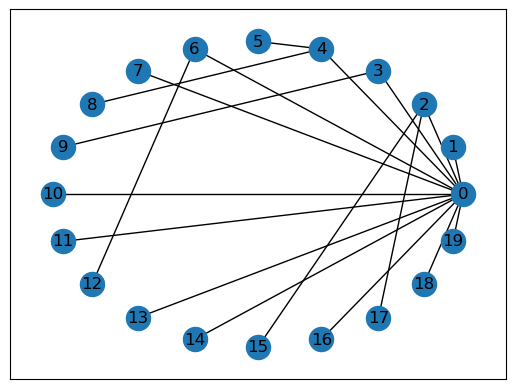

In [15]:
# A sample Barabasi-Albert Graph

n = 20
p = 0.05
d = int(np.ceil(n*p))
G = nx.barabasi_albert_graph(n, d)

graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G, pos)

### Degree Analysis

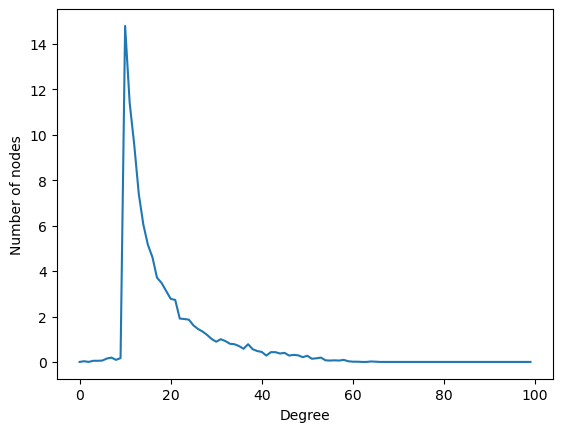

In [16]:
# Plot the degree histogram of BA(n,d) averaged over 100 trials each for different values of p
import numpy as np
n = 100
d = 10

repeats = 100
deg_hist_table = np.zeros((repeats, n))

random.seed()
for i in range(repeats):
    G = nx.barabasi_albert_graph(n, d)
    dh = nx.degree_histogram(G)
    deg_hist_table[i,0:len(dh)] = dh 

deg_hist = sum(deg_hist_table)/repeats
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.plot(deg_hist)

### Centrality Analysis

In [17]:
## Exercise 3a. Analyse the centrality measures of BA(1000, 0.1)

# Parameters
n = 1000
p = 0.1
d = int(np.ceil(n * p))  # d = 100

# Generate Barabási-Albert graph
G = nx.barabasi_albert_graph(n, d, seed=42)

# Check connectivity and use largest component if disconnected
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Using largest component with {G.number_of_nodes()} nodes.")

# Compute centrality measures
print("Computing degree centrality...")
degree_cent = list(nx.degree_centrality(G).values())

print("Computing betweenness centrality... (May take time)")
betweenness_cent = list(nx.betweenness_centrality(G, normalized=True).values())

print("Computing closeness centrality...")
closeness_cent = list(nx.closeness_centrality(G).values())

print("Computing eigenvector centrality...")
eigenvector_cent = list(nx.eigenvector_centrality(
    G, max_iter=1000, tol=1e-6).values())

Computing degree centrality...
Computing betweenness centrality... (May take time)
Computing closeness centrality...
Computing eigenvector centrality...


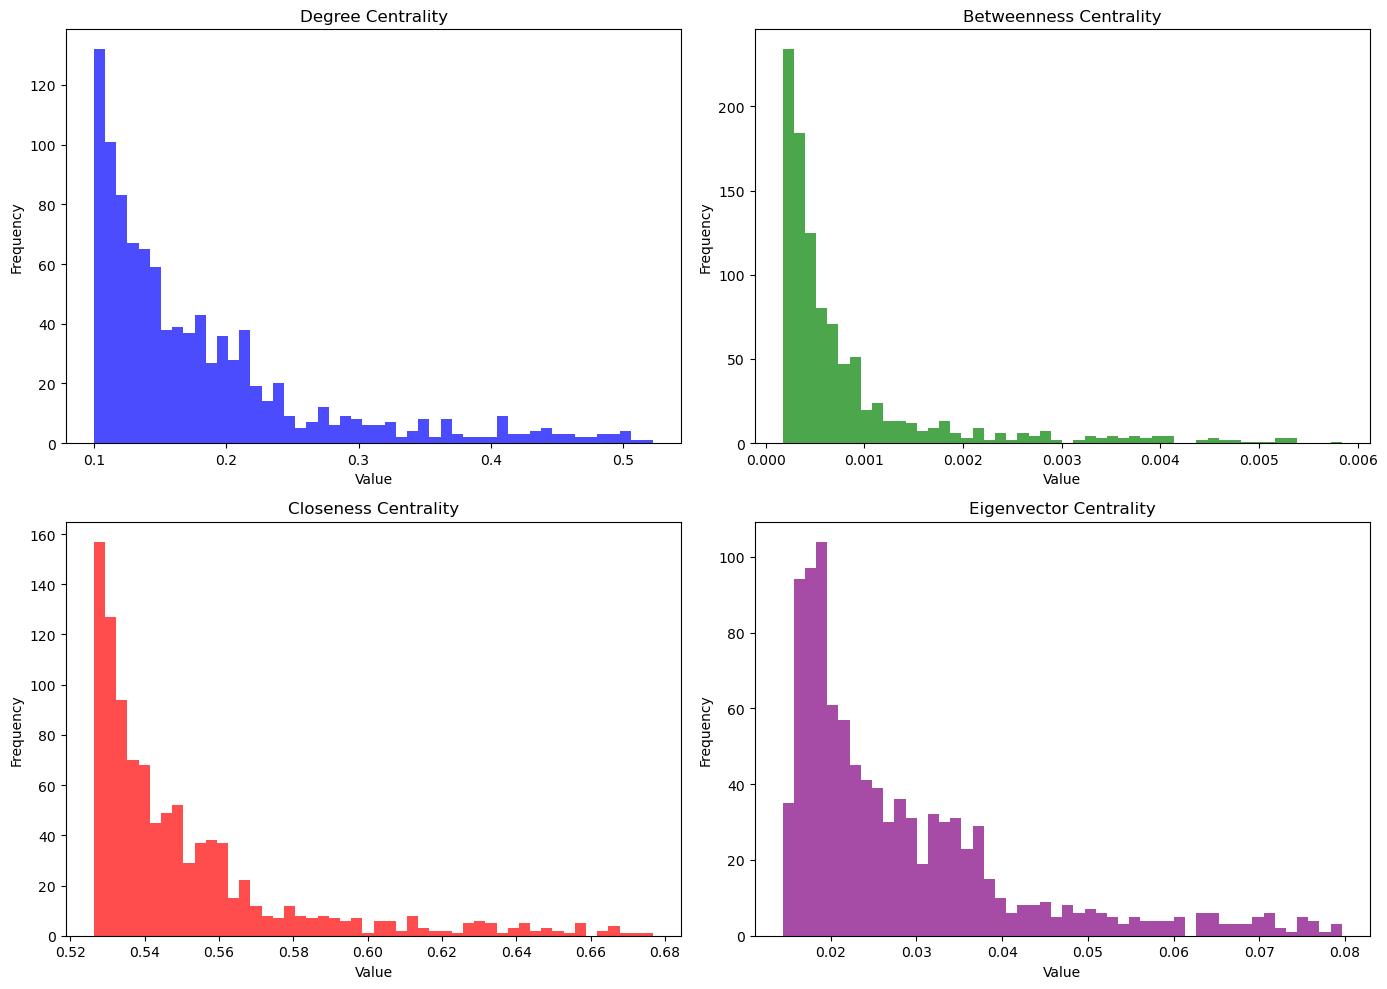

In [18]:
# Exercise 3b: Histogram of Centrality Measures of BA(1000, 0.1)

# Plot histograms
plt.figure(figsize=(14, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.hist(degree_cent, bins=50, color='blue', alpha=0.7)
plt.title('Degree Centrality')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(2, 2, 2)
plt.hist(betweenness_cent, bins=50, color='green', alpha=0.7)
plt.title('Betweenness Centrality')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Closeness Centrality
plt.subplot(2, 2, 3)
plt.hist(closeness_cent, bins=50, color='red', alpha=0.7)
plt.title('Closeness Centrality')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Eigenvector Centrality
plt.subplot(2, 2, 4)
plt.hist(eigenvector_cent, bins=50, color='purple', alpha=0.7)
plt.title('Eigenvector Centrality')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Phase Transitions

Processing d = 1...
Processing d = 2...
Processing d = 3...
Processing d = 4...
Processing d = 5...
Processing d = 6...
Processing d = 7...
Processing d = 8...
Processing d = 9...
Processing d = 10...
Processing d = 11...
Processing d = 12...
Processing d = 13...
Processing d = 14...
Processing d = 15...
Processing d = 16...
Processing d = 17...
Processing d = 18...
Processing d = 19...
Processing d = 20...


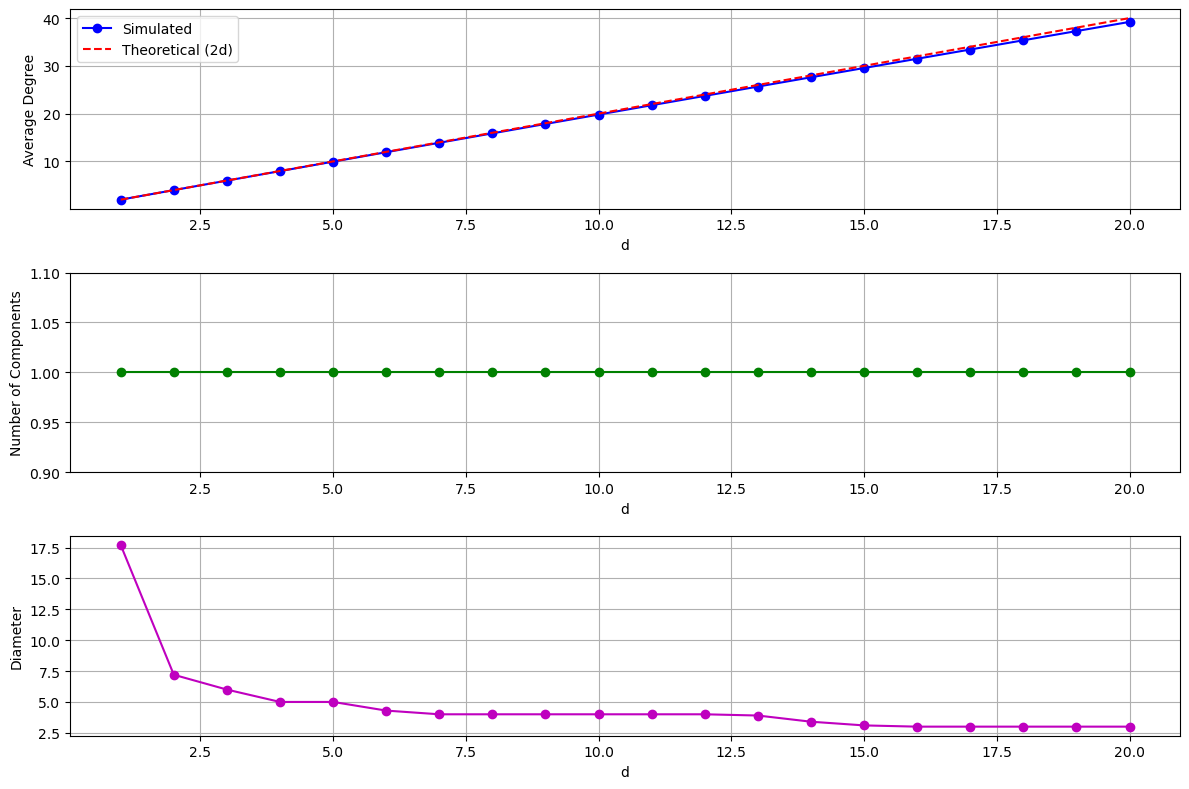

In [19]:
# Exercise 4: Phase Transitions of BA(1000, d) for d from 1 to 20
# (Average Degree, Number of Components, Diameter when Connected)

# Parameters
n = 1000
d_values = np.arange(1, 21)  # d from 1 to 20
repeats = 10  # Number of trials per d

# Initialize metric arrays
avg_deg = np.zeros(len(d_values))
num_comps = np.zeros(len(d_values))
diameters = np.zeros(len(d_values))

for idx, d in enumerate(d_values):
    print(f"Processing d = {d}...")
    total_adeg = 0.0
    total_comp = 0.0
    total_dia = 0.0

    for _ in range(repeats):
        # Generate BA graph
        G = nx.barabasi_albert_graph(n, d)
        # Average degree
        total_adeg += 2 * G.number_of_edges() / n
        # Number of components (always 1 for BA graphs)
        total_comp += nx.number_connected_components(G)
        # Diameter (already connected)
        total_dia += nx.diameter(G)

    # Average metrics
    avg_deg[idx] = total_adeg / repeats
    num_comps[idx] = total_comp / repeats
    diameters[idx] = total_dia / repeats

# Plotting
plt.figure(figsize=(12, 8))

# Average Degree
plt.subplot(3, 1, 1)
plt.plot(d_values, avg_deg, 'b-o', label='Simulated')
plt.plot(d_values, 2 * d_values, 'r--', label='Theoretical (2d)')
plt.xlabel('d')
plt.ylabel('Average Degree')
plt.legend()
plt.grid(True)

# Number of Components (always 1)
plt.subplot(3, 1, 2)
plt.plot(d_values, num_comps, 'g-o')
plt.xlabel('d')
plt.ylabel('Number of Components')
plt.ylim(0.9, 1.1)  # Emphasize constant value
plt.grid(True)

# Diameter
plt.subplot(3, 1, 3)
plt.plot(d_values, diameters, 'm-o')
plt.xlabel('d')
plt.ylabel('Diameter')
plt.grid(True)

plt.tight_layout()
plt.show()